4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step
shap_values[0] shape: (6, 3)
shap_values[1] shape: (6, 3)
shap_values[2] shape: (6, 3)
shap_values[3] shape: (6, 3)
shap_values[4] shape: (6, 3)
shap_values[5] shape: (6, 3)
shap_values[6] shape: (6, 3)
shap_va

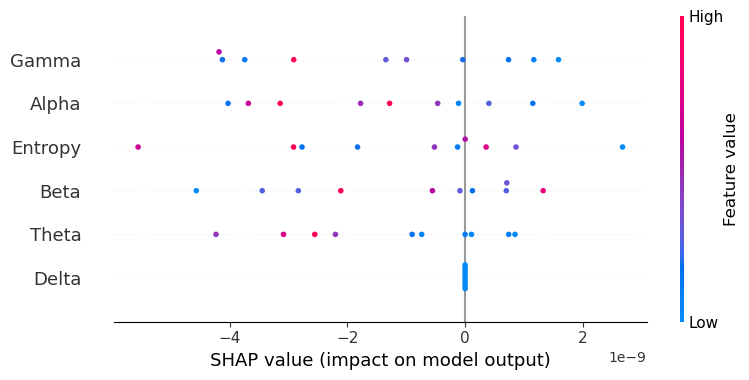

In [23]:
import shap
import numpy as np
from tensorflow.keras.models import load_model

# Charger le modèle et les données combinées
model = load_model('/Users/pro/Desktop/BigData/ProjetEEG/model1/eeg_model_for5s.h5')
combined_features = np.load('/Users/pro/Desktop/BigData/ProjetEEG/data1/combined_features.npy')  # Shape: (n_samples, n_features)

# Noms des bandes de fréquence (features)
feature_names = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'Entropy']  # 6 caractéristiques

# Adapter la prédiction pour les données aplaties
def predict_flat(data):
    reshaped_data = data.reshape(data.shape[0], 1, data.shape[1])  # (n_samples, timesteps=1, n_features)
    return model.predict(reshaped_data)

# Créer un explainer SHAP pour les données aplaties
explainer = shap.KernelExplainer(predict_flat, combined_features[:100])  # Exemple avec un sous-ensemble

# Calculer les valeurs de SHAP pour un sous-ensemble
shap_values = explainer.shap_values(combined_features[:10])  # Exemple avec 10 segments

# Vérifier les dimensions des shap_values
for i, shap_val in enumerate(shap_values):
    print(f"shap_values[{i}] shape: {shap_val.shape}")

# Agréger les contributions des classes (moyenne sur l'axe des classes)
aggregated_shap_values = np.mean(shap_values, axis=2)  # Résultat : (10, 6)

# Résumé global pour les bandes de fréquence
shap.summary_plot(aggregated_shap_values, combined_features[:10], feature_names=feature_names)



In [24]:
# Importance globale : moyenne absolue des valeurs SHAP sur tous les segments
global_importance = np.mean(np.abs(aggregated_shap_values), axis=0)  # Shape : (n_features,)


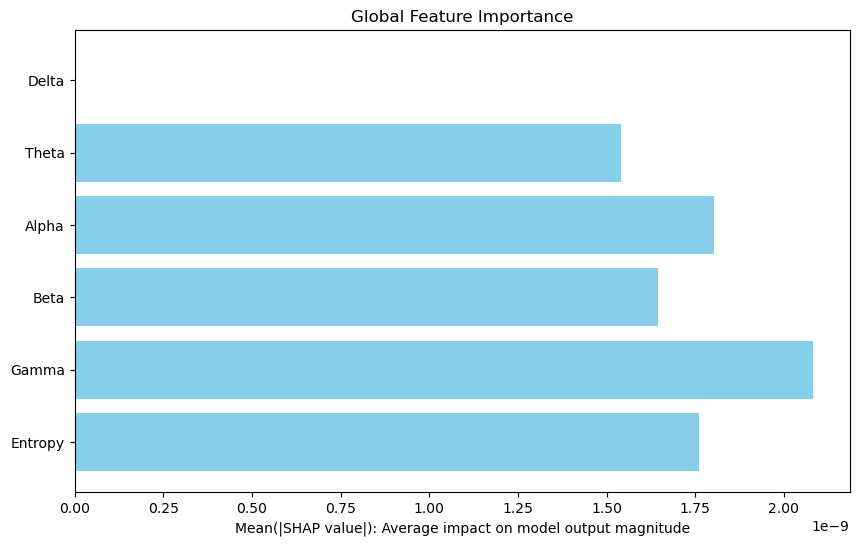

In [25]:
import matplotlib.pyplot as plt

# Tracer le graphique d'importance globale
plt.figure(figsize=(10, 6))
plt.barh(feature_names, global_importance, color="skyblue")
plt.xlabel("Mean(|SHAP value|): Average impact on model output magnitude")
plt.title("Global Feature Importance")
plt.gca().invert_yaxis()  # Inverser l'axe des Y pour que la caractéristique la plus importante soit en haut
plt.show()


In [27]:
import shap
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Charger le modèle et les données combinées
model = load_model('/Users/pro/Desktop/BigData/ProjetEEG/model1/eeg_model_for5s.h5')
combined_features = np.load('/Users/pro/Desktop/BigData/ProjetEEG/data1/combined_features.npy')  # Shape: (n_samples, n_features)

# Noms des bandes de fréquence (features)
feature_names = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'Entropy']  # 6 caractéristiques

# Adapter la prédiction pour les données aplaties
def predict_flat(data):
    reshaped_data = data.reshape(data.shape[0], 1, data.shape[1])  # (n_samples, timesteps=1, n_features)
    return model.predict(reshaped_data)

# Créer un explainer SHAP pour un sous-ensemble plus large
sample_size = 100  # Taille de l'échantillon
explainer = shap.KernelExplainer(predict_flat, combined_features[:sample_size])  # Exemple avec un sous-ensemble de 100 segments

# Calculer les valeurs de SHAP pour tout l'échantillon
shap_values = explainer.shap_values(combined_features[:sample_size])  # Calcul pour tout l'échantillon

# Vérifier les dimensions des shap_values
for i, shap_val in enumerate(shap_values):
    print(f"shap_values[{i}] shape: {shap_val.shape}")

# Agréger les contributions des classes (moyenne sur l'axe des classes)
aggregated_shap_values = np.mean(shap_values, axis=2)  # Résultat : (sample_size, n_features)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
94/94 ━━━━━━━━

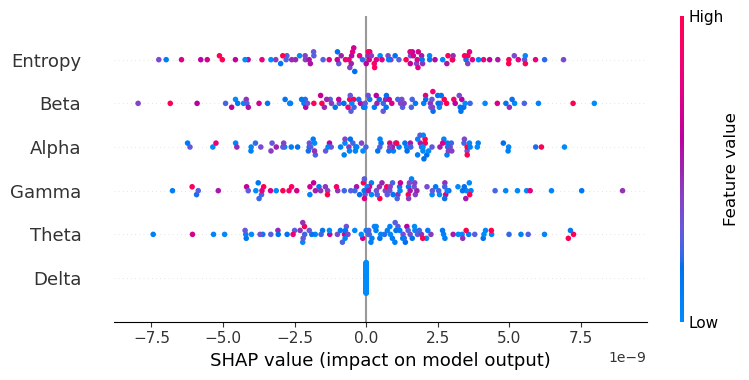

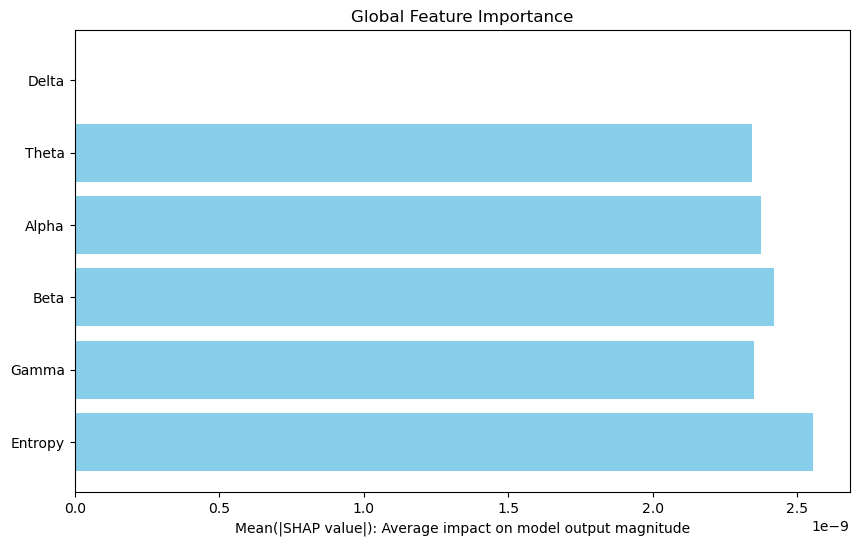

In [28]:
# Résumé global pour les bandes de fréquence
shap.summary_plot(aggregated_shap_values, combined_features[:sample_size], feature_names=feature_names)

# Importance globale : moyenne absolue des valeurs SHAP sur tous les segments
global_importance = np.mean(np.abs(aggregated_shap_values), axis=0)  # Shape : (n_features,)

# Tracer le graphique d'importance globale
plt.figure(figsize=(10, 6))
plt.barh(feature_names, global_importance, color="skyblue")
plt.xlabel("Mean(|SHAP value|): Average impact on model output magnitude")
plt.title("Global Feature Importance")
plt.gca().invert_yaxis()  # Inverser l'axe des Y pour que la caractéristique la plus importante soit en haut
plt.show()


In [37]:
import shap
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Charger le modèle et les données combinées
model = load_model('/Users/pro/Desktop/BigData/ProjetEEG/model1/eeg_model_for5s.h5')
combined_features = np.load('/Users/pro/Desktop/BigData/ProjetEEG/data1/combined_features.npy')  # Shape: (n_samples, n_features)

# Noms des bandes de fréquence (features)
feature_names = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'Entropy']  # 6 caractéristiques

# Adapter la prédiction pour les données aplaties
def predict_flat(data):
    reshaped_data = data.reshape(data.shape[0], 1, data.shape[1])  # (n_samples, timesteps=1, n_features)
    return model.predict(reshaped_data)

# Créer un explainer SHAP pour un sous-ensemble plus large
sample_size = 1000  # Taille de l'échantillon
explainer = shap.KernelExplainer(predict_flat, combined_features[:sample_size])  # Exemple avec un sous-ensemble de 100 segments

# Calculer les valeurs de SHAP pour tout l'échantillon
shap_values = explainer.shap_values(combined_features[:sample_size])  # Calcul pour tout l'échantillon

# Vérifier les dimensions des shap_values
for i, shap_val in enumerate(shap_values):
    print(f"shap_values[{i}] shape: {shap_val.shape}")

# Agréger les contributions des classes (moyenne sur l'axe des classes)
aggregated_shap_values = np.mean(shap_values, axis=2)  # Résultat : (sample_size, n_features)



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14

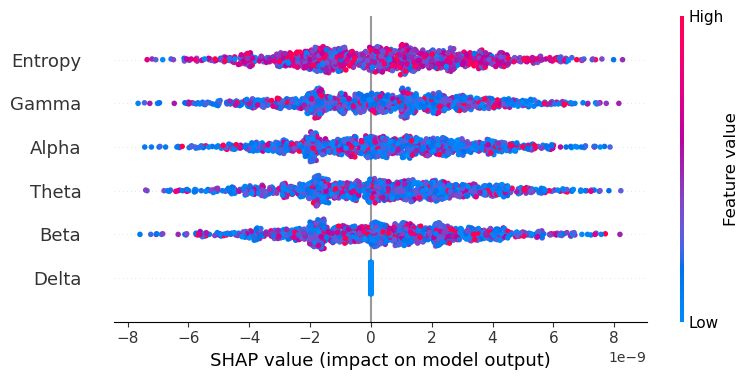

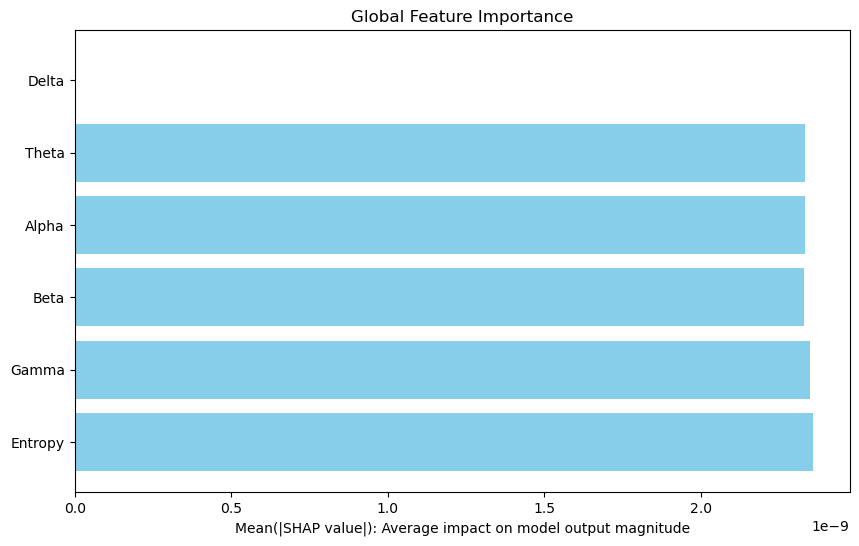

In [38]:
# Résumé global pour les bandes de fréquence
shap.summary_plot(aggregated_shap_values, combined_features[:sample_size], feature_names=feature_names)

# Importance globale : moyenne absolue des valeurs SHAP sur tous les segments
global_importance = np.mean(np.abs(aggregated_shap_values), axis=0)  # Shape : (n_features,)

# Tracer le graphique d'importance globale
plt.figure(figsize=(10, 6))
plt.barh(feature_names, global_importance, color="skyblue")
plt.xlabel("Mean(|SHAP value|): Average impact on model output magnitude")
plt.title("Global Feature Importance")
plt.gca().invert_yaxis()  # Inverser l'axe des Y pour que la caractéristique la plus importante soit en haut
plt.show()
